In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./data/wine_data.csv')

In [3]:
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [4]:
df = pd.read_csv('./data/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class Labels', 'Alcohol','Mailic Acid']

In [5]:
df.head()

,Class Labels,Alcohol,Mailic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

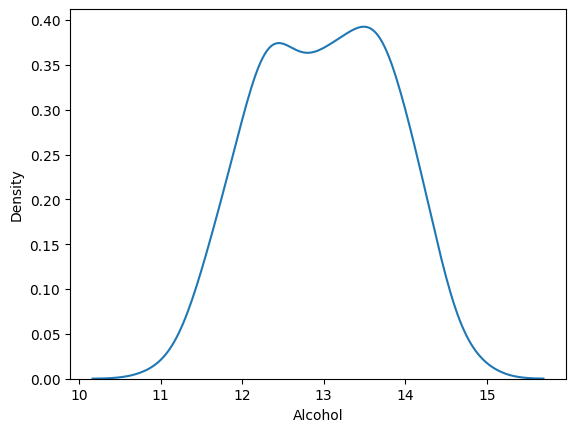

In [6]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Mailic Acid', ylabel='Density'>

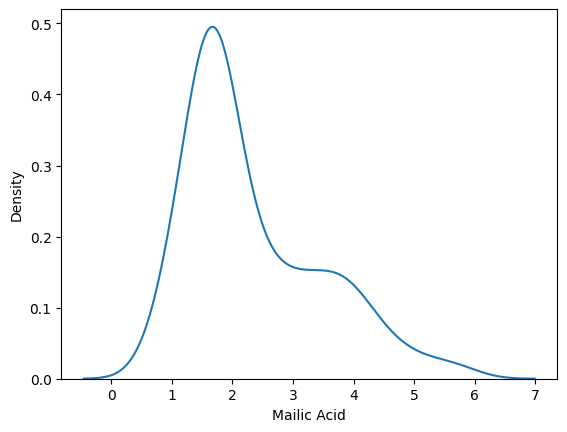

In [7]:
sns.kdeplot(df['Mailic Acid'])

<Axes: xlabel='Alcohol', ylabel='Mailic Acid'>

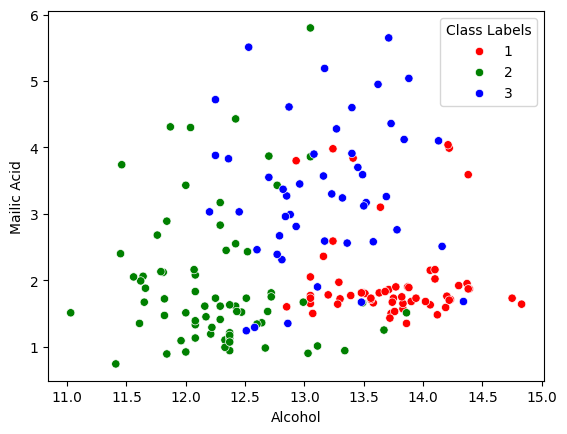

In [9]:
color_dist = {1:"red",2:"green",3:"blue"}
sns.scatterplot(data=df,x='Alcohol',y='Mailic Acid',hue='Class Labels',palette=color_dist)

# Min Max Scaler

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Class Labels',axis=1),df['Class Labels'],test_size=0.3,random_state=0)

In [12]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler to the tarin set, it will learn the parameters
scaler.fit(X_train)

# Transform train and test data
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [15]:
X_train_scaler = pd.DataFrame(X_train_scaler,columns=X_train.columns)
X_test_scaler = pd.DataFrame(X_test_scaler,columns=X_test.columns)

In [16]:
np.round(X_train.describe(),1)

,Alcohol,Mailic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [17]:
np.round(X_train_scaler.describe(),1)

,Alcohol,Mailic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


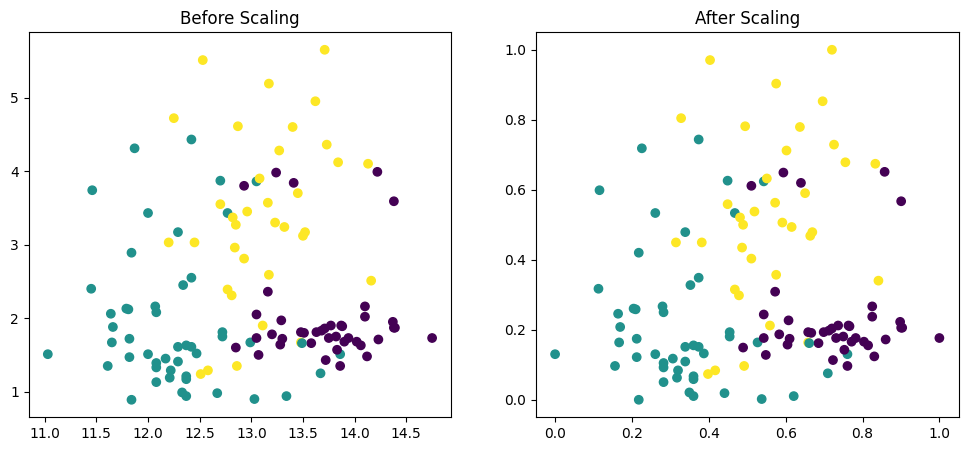

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Mailic Acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaler['Alcohol'], X_train_scaler['Mailic Acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

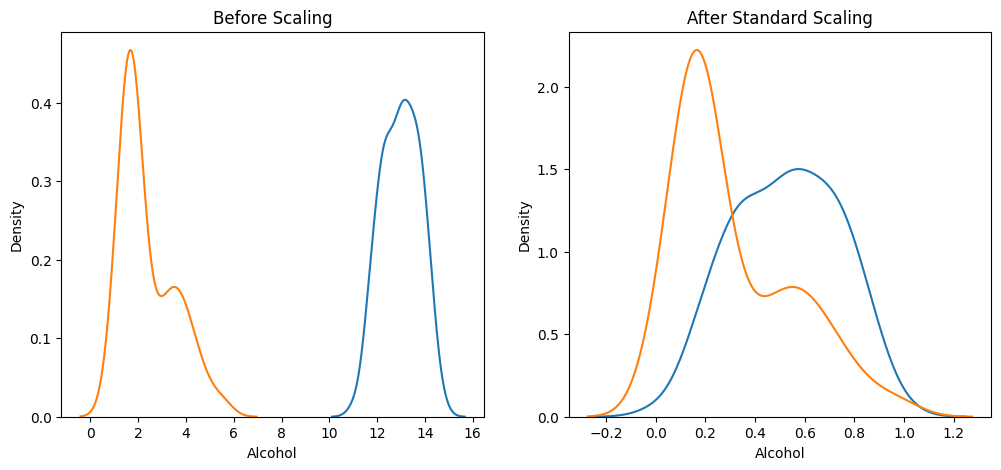

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Mailic Acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaler['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaler['Mailic Acid'], ax=ax2)
plt.show()

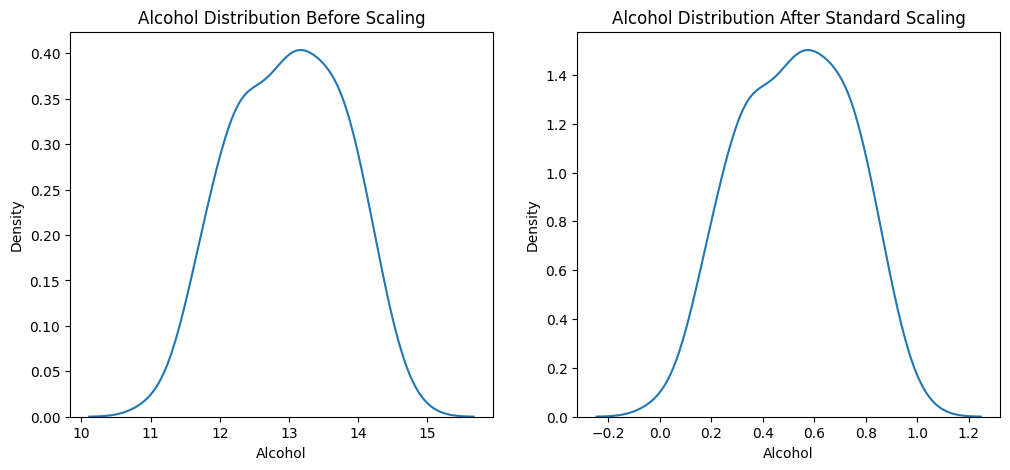

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaler['Alcohol'], ax=ax2)
plt.show()

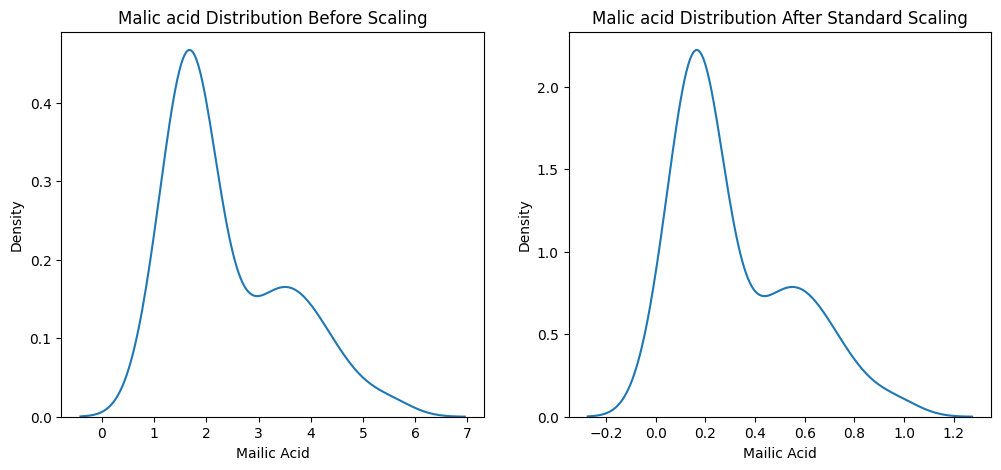

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Mailic Acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaler['Mailic Acid'], ax=ax2)
plt.show()